- 目录
    - 简介
    - 模型
        - 分类器
        - 模型解释
    - 参数估计
    - 常见问题及改进方法
    - NB算法优缺点总结
    - 朴素贝叶斯算法举例
    - sklearn 实现
        - GNB、MNB、CNB

### 简介
- **朴素贝叶斯（Naive Bayes）是一种以“贝叶斯定理”为基础、以“特征条件独立”为强假设的生成式分类模型，决策方式是后验概率最大化，即求在给定实例x（特征向量）的情况下，后验概率最大时的类别**
    - 朴素的含义：特征条件独立性假设，即假设各特征之间相互独立。
    - 朴素的意义：简化运算难度，方便求解类条件概率的联合概率。

### 模型

#### 分类器
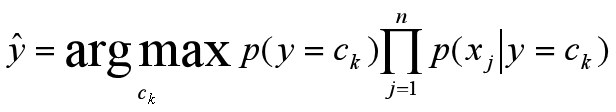
- 数据规定：
    - 输入空间 ：χ : Rn （n维 ）      输出空间 ：γ={c1，c2，...,ck}
    - 训练集D={ (x1,y1),(x2,y2) ... (xN,yN) }
    - Xij：第i个样本的第j个特征
    - Xj：第j个特征的某个可能取值

#### 模型解释

- 贝叶斯分类器就是要求在给定实例x（特征向量F）的情况下，求后验概率最大时的类别，所以只需算出每一分类结果下的后验概率，然后取后验概率最大时的类别为实例的类别即可。
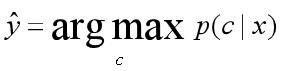
    - 例如对于二分类问题，给定实例特征向量F，只需求出 p(0|F)、p(1|F)
        - 若p(0|F)>p(1|F)，则分类结果为0
        - 若p(0|F)<p(1|F)，则分类结果为1
        

- 由贝叶斯定理可知
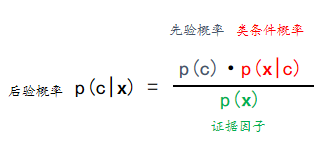

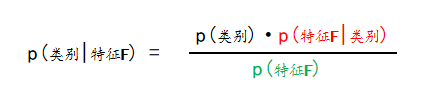

- 对于给定样本的前提下证据因子p(x)与类标记无关（况且结果只需比较大小），所以可以省去分母，所以只需求出先验概率p(c)及类条件概率p(x|c),就可以算出实例属于每一类的后验概率，所以估计p(c|x)的问题转换为如何基于训练数据D来估计先验概率p(c)及类条件概率p(x|c)（这也是下面要讲的朴素贝叶斯的参数估计）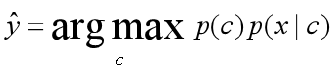

- 只是难点在于类条件概率p(x（特征向量F）|c)是x所以特征上的联合概率，很难从有限的样本中获取，计算难度也高，为了避开这个障碍，朴素贝叶斯分类器采用了“特征条件独立性假设”，这样可以得到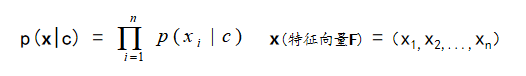因此有了上面的朴素贝叶斯分类器，下面要解决的就是参数估计问题

### 参数估计
- 朴素贝叶斯需要估计的参数是先验概率P(c)、类条件概率P(x|c),参数估计方法是极大似然估计法

- 符号规定：
    - I：示性函数
    - 输入空间 ：χ : Rn（n维 ）      输出空间 ：γ={c1，c2，...,ck}
    - 训练集D={ (x1,y1),(x2,y2) ... (xN,yN) }
    - Xij：第i个样本的第j个特征
    - ajl:第j个特征的第l个取值
    - Xj：第j个特征的某个可能取值

1.先验概率：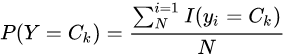

2.类条件概率：
- 对离散型特征
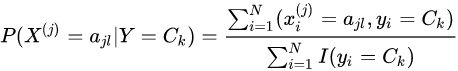

- 对连续型特征
     - 对连续型特征可以考虑概率密度函数，假定p(x|c)服从某一分布，求出分布的密度函数，即可求出概率
     - 以高斯分布为例，假定p(x|c)～N(μ，δ^2)则只需求出μ和δ即可算出概率
    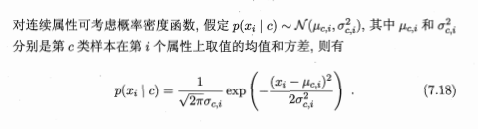

### 常见问题及解决方法

**1、** ： 对于离散的特征，我们还要考虑后验条件概率等于0的情况。
- 比如，当输入的数据出现了一个训练集中没有出现的值，那么此时的类条件概率 p(x|c) 为0，这样尽管其他特征值在与某一类别相关性很高，算出的概率也为0，引用知乎上一段话就是“这就好像一个从来都只看过鸟在天上飞的人，突然有一天看到了一只在地上走的鸟，不管它的其它特征多么像鸟，这个人都断定所看到的的绝对不是鸟”
- **解决方法**：贝叶斯估计   
    - 用贝叶斯方法来估计参数，其方法就是给每一个属性上的所有可能取值都+λ，所以这样每个属性就假定至少有λ
    - λ=0 ：MLE        λ=1 : 拉普拉斯平滑

- 修正后先验概率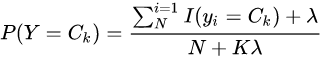

- 修正后类条件概率 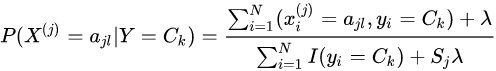

**2、** ： 虽然条件独立性假设简化了计算，但当特征众多的时候，乘法的计算量还是很大，而且概率都是小数，连乘容易造成下溢。
- **解决方法**：取log变换，变为加法。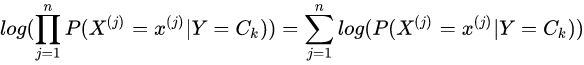

**3、** ： 如何得到真实的后验概率？
   - 由于朴素贝叶斯在计算后验概率时，去掉了分母，所以使得计算的结果并非真实的后验概率，所有后验概率的和也不是1。
- **解决方法**：用某一后验概率除以所有后验概率的和
    - 例如：对二分类，由朴素贝叶斯算出的后验概率分别为：p(0|x) = p0 p(1|x) = p1，则真实后验概率分别为：p(0|x) = p0/(p0+p1) 、 p(0|x) = p1/(p0+p1)

### 朴素贝叶斯的优点和缺点
   - 优点：
       - 算法简单、迅速、方便，在多类预测中表现良好。 
       - 对缺失数据及噪声不敏感且有稳定的分类效率。
       - 适合增量式训练，尤其是数据量超出内存时，可以一批批的去增量训练。
   - 缺点：
        - 独立预测因子的假设无法实现，在属性个数比较多或属性之间存在较大相关性时，该算法的效果不是很好。
        - 需要知道先验概率，且先验概率很多时候取决于假设。
        - 通过先验和数据来决定后验的概率从而决定分类，所以分类决策存在一定的错误率。
        - 对输入数据的表达形式很敏感。

### 朴素贝叶斯算法举例
- 周志华老师《机器学习》书籍上的例子很不错了，而且有离散型特征和连续型特征概率的计算，所以我就不再举例了。
- 西瓜书p151-p154

**声明**：
- 此文章是个人机器学习知识点总结笔记，为了需要时方便查阅，所以上传到知乎账号上，因为是初学者，所以难免有错误的地方，欢迎大家交流指正，如果能帮到大家，那就再好不过了。
- 参考资料：
    - 《统计学习方法》（李航）
    - 《机器学习》（周志华）
    - 数据挖掘导论（Pang-Ning Tan、Michael Steinbach、Vipin Kumar著）
    - sklearn指导文档
    - 西瓜书数学推导补充https://datawhalechina.github.io/pumpkin-book/#/